In [1]:
import yt
import numpy as np

In [2]:
aspect_x = yt.load("acoustic_pulse_128_x_plt00161", hint="castro")
aspect_y = yt.load("acoustic_pulse_128_y_plt00161", hint="castro")

yt : [INFO     ] 2022-08-05 12:20:05,333 Parameters: current_time              = 0.24
yt : [INFO     ] 2022-08-05 12:20:05,334 Parameters: domain_dimensions         = [ 32 128   1]
yt : [INFO     ] 2022-08-05 12:20:05,335 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-05 12:20:05,335 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-08-05 12:20:05,374 Parameters: current_time              = 0.24
yt : [INFO     ] 2022-08-05 12:20:05,375 Parameters: domain_dimensions         = [128  32   1]
yt : [INFO     ] 2022-08-05 12:20:05,375 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-08-05 12:20:05,376 Parameters: domain_right_edge         = [1. 1. 1.]


In [3]:
field = ("boxlib", "Temp")

yt : [INFO     ] 2022-08-05 12:20:06,083 xlim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 12:20:06,084 ylim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 12:20:06,084 xlim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 12:20:06,085 ylim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 12:20:06,086 Making a fixed resolution buffer of (('boxlib', 'Temp')) 800 by 800



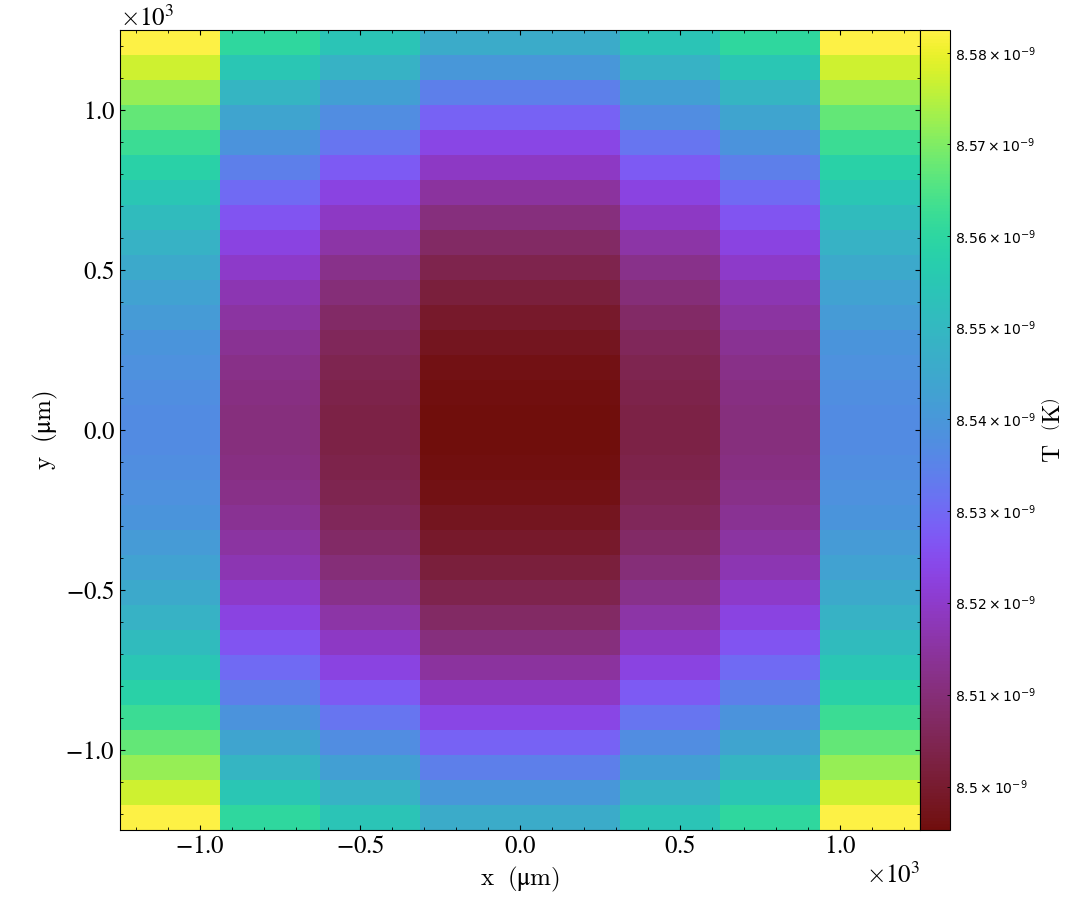

In [4]:
spx = yt.SlicePlot(aspect_x, "z", field, width=[0.25, 0.25, 0.75, 0.75])
spx

yt : [INFO     ] 2022-08-05 12:20:07,075 xlim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 12:20:07,076 ylim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 12:20:07,076 xlim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 12:20:07,077 ylim = 0.375000 0.625000
yt : [INFO     ] 2022-08-05 12:20:07,078 Making a fixed resolution buffer of (('boxlib', 'Temp')) 800 by 800



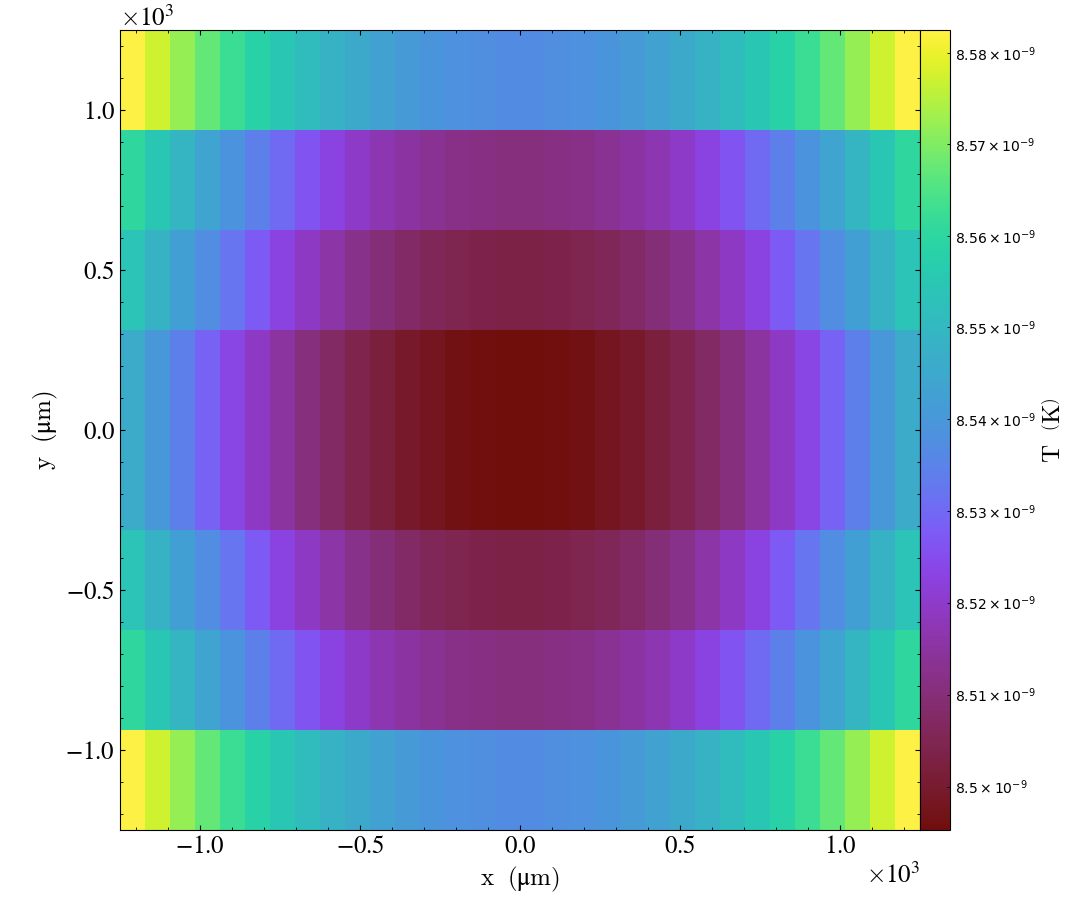

In [5]:
spy = yt.SlicePlot(aspect_y, "z", field, width=[0.25, 0.25, 0.75, 0.75])
spy

## let's compare the two

We want to transpose one and then diff.  But first we'll compare the max.

Here we loop over all fields and print the difference of the min and max between the two runs.

Also note that the velocities work work here, since x_velocity in one test corresponds to y_velocity in the other, since we should think of the two runs as transposes of one another.

In [6]:
for field in aspect_x.field_list:
    ddx = aspect_x.all_data()
    fx_min, fx_max = ddx.quantities.extrema(field)
    
    ddy = aspect_y.all_data()
    fy_min, fy_max = ddy.quantities.extrema(field)
    
    print(f"{field[1]:20}: {float(fx_min.d - fy_min.d):20} {float(fx_max.d - fy_max.d):20}")

Gamma_1             :                  0.0                  0.0
MachNumber          : -1.0268953643456267e-16 2.0122792321330962e-16
StateErr_0          : 2.220446049250313e-16 -2.220446049250313e-16
StateErr_1          :                  0.0 -1.1580528575742387e-23
StateErr_2          :                  0.0                  0.0
Temp                :                  0.0 -1.1580528575742387e-23
X(X)                :                  0.0                  0.0
abar                :                  0.0                  0.0
angular_momentum_x  :                  0.0                  0.0
angular_momentum_y  :                  0.0                  0.0
angular_momentum_z  : -5.149960319306146e-17 -1.6588293239028218e-17
circvel             : 4.6525008472339007e-17 -8.53267109746092e-17
density             : 2.220446049250313e-16 -2.220446049250313e-16
divu                : -1.0880185641326534e-14 -1.73749903353837e-14
eint_E              : 2.220446049250313e-16 -2.220446049250313e-15
eint_e  

In [7]:
type(float(fx_min.d))

float

In [8]:
dd = aspect_x.all_data()
x, y = dd.quantities.extrema(field)

In [9]:
dd = aspect_y.all_data()
dd.quantities.extrema(field)

unyt_array([0., 0.], 'g/(cm**2*s)')

Now we'll make a covering grid, transpose, diff, and look at the max

In [10]:
aspect_x.field_list

[('boxlib', 'Gamma_1'),
 ('boxlib', 'MachNumber'),
 ('boxlib', 'StateErr_0'),
 ('boxlib', 'StateErr_1'),
 ('boxlib', 'StateErr_2'),
 ('boxlib', 'Temp'),
 ('boxlib', 'X(X)'),
 ('boxlib', 'abar'),
 ('boxlib', 'angular_momentum_x'),
 ('boxlib', 'angular_momentum_y'),
 ('boxlib', 'angular_momentum_z'),
 ('boxlib', 'circvel'),
 ('boxlib', 'density'),
 ('boxlib', 'divu'),
 ('boxlib', 'eint_E'),
 ('boxlib', 'eint_e'),
 ('boxlib', 'entropy'),
 ('boxlib', 'kineng'),
 ('boxlib', 'logden'),
 ('boxlib', 'magmom'),
 ('boxlib', 'magvel'),
 ('boxlib', 'magvort'),
 ('boxlib', 'pressure'),
 ('boxlib', 'radvel'),
 ('boxlib', 'rho_E'),
 ('boxlib', 'rho_X'),
 ('boxlib', 'rho_e'),
 ('boxlib', 'soundspeed'),
 ('boxlib', 'x_velocity'),
 ('boxlib', 'xmom'),
 ('boxlib', 'y_velocity'),
 ('boxlib', 'ymom'),
 ('boxlib', 'z_velocity'),
 ('boxlib', 'zmom')]

In [11]:
level = 0

# assumes ref_ratio is constant
dims_x = aspect_x.domain_dimensions * aspect_x.refine_by**level
dims_y = aspect_y.domain_dimensions * aspect_y.refine_by**level

for field in aspect_x.field_list:

    # swap the velocity components, since we are transposing
    
    y_field = field
    if field == ("boxlib", "x_velocity"):
        y_field = ("boxlib", "y_velocity")
    elif field == ("boxlib", "y_velocity"):
        y_field = ("boxlib", "x_velocity")
    elif field == ("boxlib", "xmom"):
        y_field = ("boxlib", "ymom")
    elif field == ("boxlib", "ymom"):
        y_field = ("boxlib", "xmom")
        
    cg_x = aspect_x.covering_grid(level, left_edge=[0, 0, 0], dims=dims_x, fields=[field])
    f_aspect_x = cg_x.field_data[field][:,:,0]
    
    cg_y = aspect_y.covering_grid(level, left_edge=[0, 0, 0], dims=dims_y, fields=[y_field])
    f_aspect_y = cg_y.field_data[y_field][:,:,0]
    
    abs_err = np.max(np.abs(f_aspect_x - f_aspect_y.T))
    rel_err = np.max(np.abs(f_aspect_x - f_aspect_y.T)/f_aspect_x)
    print(f"{field[1]:20} : {abs_err.d:30.20g} {rel_err.d:30.20g}")

Gamma_1              :                              0                              0
MachNumber           :       3.486848396822006535e-15      1.1169784170317064569e-08
StateErr_0           :      8.6597395920762210153e-15      6.1853431346847923539e-15
StateErr_1           :      3.4741585727227162345e-23      4.0394564416471441531e-15
StateErr_2           :                              0                              0
Temp                 :      3.4741585727227162345e-23      4.0394564416471441531e-15
X(X)                 :                              0                              0
abar                 :                              0                              0
angular_momentum_x   :                              0                            nan
angular_momentum_y   :                              0                            nan
angular_momentum_z   :      0.00050257700846702388527          2.0000000277233436208
circvel              :      1.6511183901724365989e-13       2.514

/home/zingale/.local/lib/python3.10/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(
